<div style='float: right'><img src='pic/kuriku.png'/></div>

## <div id='kuriku' />クリーク

In [1]:
#!pip3 install pulp ortoolpy
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt
from pulp import LpProblem, lpSum, value
from ortoolpy import addbinvars, unionfind
data = """\
....1.
0.....
..3.4.
.2.12.
...1.1
......""".splitlines()

### 問題
* いくつかのマスを黒くぬります
* 数字は、数字が隣接するマス中の黒マスの数を表します
* すべての白マスは連結すること

### 変数
* v：0:white, 1:black (1)

### 制約
* 数字と黒マス数が等しいこと (2)
* 全白マスが連結すること (3)

In [2]:
ni, nj = len(data)-1, len(data[0])-1
a = pd.DataFrame([(i,j) for i in range(ni)
    for j in range(nj)], columns=['行','列'])
a['Var'] = addbinvars(len(a))
a[:2]

,行,列,Var
0,0,0,v000001
1,0,1,v000002


In [3]:
m = LpProblem()
m += lpSum(a.Var)
for i in range(ni+1):
    for j in range(nj+1):
        if data[i][j].isdigit():
            q = f'{i-1}<=行<={i}&{j-1}<=列<={j}'
            m += lpSum(a.query(q).Var) == int(data[i][j])
while True:
    m.solve()
    r = a.Var.apply(value)
    if unionfind.isconnected((r!=1).values.reshape(ni,nj)):
        break
    m += lpSum(a[r==1].Var) <= (r==1).sum()-1

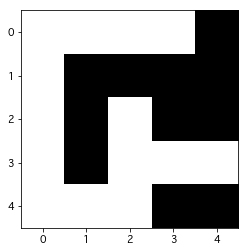

In [4]:
plt.imshow((1-r).values.reshape(ni,nj), cmap='gray', interpolation='none');